# Assignment SWE5204 - Advanced Databases and Big Data

## Required libraries - importing the necesarry libraries to be able to analyzise and vizualize the data

In [1]:
#Libraries for data manipulation
import pandas as pd
import numpy as np

#Libraries for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#Library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data loading 

In [2]:
flights = pd.read_csv('flights.csv')  # Read the downloaded file

## Analyzing the data

In [3]:
print(flights.shape)  # Print the number of records
print(flights.head())  # Print the first 5 records
print(flights.tail()) # Print the last 5 records
print(flights.info) # Print flight information

(5819079, 31)
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  

In [4]:
flights.nunique() # Checking for duplication
flights.duplicated().sum()

0

In [6]:
## Checking for missing data
flights.isnull().sum()
##Checking the percentage of missing values in each column
(flights.isnull().sum()/(len(flights)))*100

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

In [6]:
##Assesing data types
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [7]:
# Count the occurrences of each unique value in the 'DIVERTED' column of the 'flights' DataFrame
value_counts_diverted = flights['DIVERTED'].value_counts()

# Print the counts of diverted flights
print(value_counts_diverted)

# Count the occurrences of each unique value in the 'CANCELLED' column of the 'flights' DataFrame
value_counts_cancelled = flights['CANCELLED'].value_counts()

# Print the counts of cancelled flights
print(value_counts_cancelled)


0    5803892
1      15187
Name: DIVERTED, dtype: int64
0    5729195
1      89884
Name: CANCELLED, dtype: int64


## Feature Engineering and Creating features

In [8]:
# Creating subsets for canceled and diverted flights
cancelled_flights = flights[flights['CANCELLED'] == 1]
diverted_flights = flights[flights['DIVERTED'] == 1]
departed_flights = flights[(flights['CANCELLED'] == 0) & (flights['DIVERTED'] == 0)]

# Getting the number of flights in each subset
num_cancelled = cancelled_flights.shape[0]
num_diverted = diverted_flights.shape[0]
num_departed = departed_flights.shape[0]
total_flights = flights.shape[0]

# Displaying the counts using markdown
from IPython.display import display, Markdown

display(Markdown(f"**Number of Cancelled Flights:** {num_cancelled}"))
display(Markdown(f"**Number of Diverted Flights:** {num_diverted}"))
display(Markdown(f"**Number of Departed Flights:** {num_departed}"))
display(Markdown(f"**Total Number of Flights:** {total_flights}"))

**Number of Cancelled Flights:** 89884

**Number of Diverted Flights:** 15187

**Number of Departed Flights:** 5714008

**Total Number of Flights:** 5819079

In [9]:
#Checking if the total number of data from each subset is matches the flights

# Count rows in each dataset
num_flights = len(flights)
num_departed = len(departed_flights)
num_cancelled = len(cancelled_flights)
num_diverted = len(diverted_flights)

# Check if sum of departed, cancelled, and diverted flights is equal to total flights
is_equal = (num_departed + num_cancelled + num_diverted) == num_flights

# Display the result
is_equal

True

# Data wrangling

### Data wrangling on Cancelled Flights subset

In [10]:
## Analyzing the Cancelled Flights subset and removing unwanted data
cancelled_flights.isnull().sum()


YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER            14721
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME         86153
DEPARTURE_DELAY        86153
TAXI_OUT               89047
WHEELS_OFF             89047
SCHEDULED_TIME             5
ELAPSED_TIME           89884
AIR_TIME               89884
DISTANCE                   0
WHEELS_ON              89884
TAXI_IN                89884
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME           89884
ARRIVAL_DELAY          89884
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON        0
AIR_SYSTEM_DELAY       89884
SECURITY_DELAY         89884
AIRLINE_DELAY          89884
LATE_AIRCRAFT_DELAY    89884
WEATHER_DELAY          89884
dtype: int64

In [11]:
## Droping unwanted columns 
# List of columns to keep 
columns_to_keep = [
    'MONTH', 'DAY', 'AIRLINE', 'FLIGHT_NUMBER', 
    'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 
    'SCHEDULED_TIME', 'DIVERTED', 
    'CANCELLED'
]

# Get the list of columns to drop by subtracting the columns_to_keep from the entire list of columns in cancelled_flights
columns_to_drop = [col for col in cancelled_flights.columns if col not in columns_to_keep]

# Drop the unwanted columns and save the result back to cancelled_flights
cancelled_flights = cancelled_flights.drop(columns=columns_to_drop)

# Display the first few rows of the cancelled_flights dataset 
cancelled_flights.head()

,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DIVERTED,CANCELLED
32,1,1,AS,136,ANC,SEA,135,205.0,0,1
42,1,1,AA,2459,PHX,DFW,200,120.0,0,1
68,1,1,OO,5254,MAF,IAH,510,87.0,0,1
82,1,1,MQ,2859,SGF,DFW,525,95.0,0,1
90,1,1,OO,5460,RDD,SFO,530,90.0,0,1


In [12]:
# Count NaN values in cancelled flights dataset
cancelled_flights.isnull().sum()

MONTH                  0
DAY                    0
AIRLINE                0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
SCHEDULED_TIME         5
DIVERTED               0
CANCELLED              0
dtype: int64

### Data wrangling on Diverted flights subset

In [11]:
# Count NaN values in diverted flights dataset
diverted_flights.isnull().sum()


YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER                0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME             0
DEPARTURE_DELAY            0
TAXI_OUT                   0
WHEELS_OFF                 0
SCHEDULED_TIME             1
ELAPSED_TIME           15187
AIR_TIME               15187
DISTANCE                   0
WHEELS_ON               2629
TAXI_IN                 2629
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2629
ARRIVAL_DELAY          15187
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    15187
AIR_SYSTEM_DELAY       15187
SECURITY_DELAY         15187
AIRLINE_DELAY          15187
LATE_AIRCRAFT_DELAY    15187
WEATHER_DELAY          15187
dtype: int64

In [13]:
# List of columns to drop
columns_to_drop = ['YEAR','ELAPSED_TIME', 'DAY_OF_WEEK','AIR_TIME', 'ARRIVAL_DELAY', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 
      'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

# Dropping the selected columns from columns_to_drop, and ignoring errors for non-existent columns
diverted_flights.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Display the first few rows of the diverted_flights dataset 
diverted_flights.head()


,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,CANCELLED
724,1,1,DL,716,N944DL,OMA,ATL,645,637.0,-8.0,27.0,704.0,144.0,821,1447.0,4.0,1009,1451.0,1,0
1455,1,1,OO,5237,N712SK,MKE,IAH,745,742.0,-3.0,15.0,757.0,176.0,984,1456.0,9.0,1041,1505.0,1,0
2218,1,1,WN,1966,N685SW,ATL,JAX,845,922.0,37.0,9.0,931.0,75.0,270,1214.0,5.0,1000,1219.0,1,0
2526,1,1,EV,4555,N12552,IAH,HRL,902,859.0,-3.0,33.0,932.0,75.0,295,1314.0,5.0,1017,1319.0,1,0
2866,1,1,WN,1081,N214WN,MDW,OKC,930,926.0,-4.0,9.0,935.0,125.0,691,1340.0,3.0,1135,1343.0,1,0


In [14]:
# Count NaN values in diverted flights dataset
diverted_flights.isnull().sum()

MONTH                     0
DAY                       0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER               0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME            0
DEPARTURE_DELAY           0
TAXI_OUT                  0
WHEELS_OFF                0
SCHEDULED_TIME            1
DISTANCE                  0
WHEELS_ON              2629
TAXI_IN                2629
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME           2629
DIVERTED                  0
CANCELLED                 0
dtype: int64

In [13]:
# Understanding the relation between 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'WHEELS_ON', 'TAXI_IN' as the NaN is quite large
diverted_flights[['SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'WHEELS_ON', 'TAXI_IN']]

,SCHEDULED_ARRIVAL,ARRIVAL_TIME,WHEELS_ON,TAXI_IN
724,1009,1451.0,1447.0,4.0
1455,1041,1505.0,1456.0,9.0
2218,1000,1219.0,1214.0,5.0
2526,1017,1319.0,1314.0,5.0
2866,1135,1343.0,1340.0,3.0
...,...,...,...,...
5813860,2141,NaN,NaN,NaN
5815052,1720,NaN,NaN,NaN
5816657,2026,2216.0,2212.0,4.0
5817342,2113,2250.0,2247.0,3.0


In [15]:
# Cleaning the NaN from SCHEDULED-TIME, WHEELS_ON, TAXI_IN and ARRIVAL_TIME columns

# Calculate the mean{average) of the SCHEDULED_TIME
mean_diverted_time = diverted_flights['SCHEDULED_TIME'].mean()

# Fill NaN value in SCHEDULED_TIME with the mean
diverted_flights['SCHEDULED_TIME'].fillna(mean_diverted_time, inplace=True)

# Fill NaN values in WHEELS_ON, TAXI_IN, and ARRIVAL_TIME columns with the median
median_columns = ['WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME']
for col in median_columns:
    median_value = diverted_flights[col].median()
    diverted_flights[col].fillna(median_value, inplace=True)

# Checking if the NaN values have been replaced with the mean
diverted_flights.isnull().sum()

MONTH                  0
DAY                    0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
DIVERTED               0
CANCELLED              0
dtype: int64

### Data wrangling on Departed (Succesfull) flights subset¶

In [16]:
## Analyzing the Cancelled Flights subset and removing unwanted data
departed_flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

In [17]:
## Droping unwanted columns 
# List of columns to drop
columns_to_drop = ['YEAR', 'DAY_OF_WEEK','DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 
                   'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

departed_flights.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

departed_flights.head()


,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,US,840,N171US,SFO,CLT,20,18.0,-2.0,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


In [18]:
# Count NaN values in diverted flights dataset
departed_flights.isnull().sum()

MONTH                  0
DAY                    0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
dtype: int64

In [19]:
## Droping DIVERTED and CANCELLED columns in cancelled_flights and diverted_flights
# List of columns to drop
columns_to_drop = ['DIVERTED', 'CANCELLED']

# Droping the selected columns from columns_to_drop
diverted_flights.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

# Droping the selected columns from columns_to_drop
cancelled_flights.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

In [20]:
# Diplaying the head of each dataset
departed_flights.head()
diverted_flights.head()
cancelled_flights.head()

,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME
32,1,1,AS,136,ANC,SEA,135,205.0
42,1,1,AA,2459,PHX,DFW,200,120.0
68,1,1,OO,5254,MAF,IAH,510,87.0
82,1,1,MQ,2859,SGF,DFW,525,95.0
90,1,1,OO,5460,RDD,SFO,530,90.0


In [21]:
# Saving my subsets in CSV files
cancelled_flights.to_csv('cancelled_flights.csv', index=False)
diverted_flights.to_csv ('diverted_flights.csv', index=False)
departed_flights.to_csv ('departed_flights.csv', index=False)

#  Exploratory Data Analysis and Statistics Summary

## Cancelled Flights - Understanding the data structure and types and summary statistics

In [22]:
#Analyze cancelled_flights subset

print(cancelled_flights.describe())# Summary Statistics
print(cancelled_flights['AIRLINE'].value_counts()) # Value Counts


              MONTH           DAY  FLIGHT_NUMBER  SCHEDULED_DEPARTURE  \
count  89884.000000  89884.000000   89884.000000         89884.000000   
mean       5.027702     15.456588    2704.677317          1374.989130   
std        3.582890      9.323337    1810.926001           499.348424   
min        1.000000      1.000000       1.000000             1.000000   
25%        2.000000      7.000000    1110.000000           928.000000   
50%        4.000000     16.000000    2600.000000          1420.000000   
75%        7.000000     24.000000    4155.000000          1811.000000   
max       12.000000     31.000000    9855.000000          2359.000000   

       SCHEDULED_TIME  
count    89879.000000  
mean       124.976157  
std         64.645795  
min         20.000000  
25%         79.000000  
50%        109.000000  
75%        155.000000  
max        679.000000  
WN    16043
EV    15231
MQ    15025
AA    10919
OO     9960
UA     6573
B6     4276
US     4067
DL     3824
NK     2004
AS    

### Overall interpration of the above information
##### There are more cancellations in the first two months of the year, January and February.
##### Cancellations are distributed throughout the day, with a slight peak in the early afternoon.
##### Most of the cancelled flights are shorter in duration, with an average of around 2 hours.
##### WN (Southwest Airlines) has the highest number of cancellations, followed by EV (ExpressJet), MQ (Envoy Air), and AA (American Airlines). HA (Hawaiian Airlines) has the least cancellations among the provided airlines.

## Cancelled Flights - Cancellatons overview, airlines analysis, temporal analysis and flight and route  cancellations


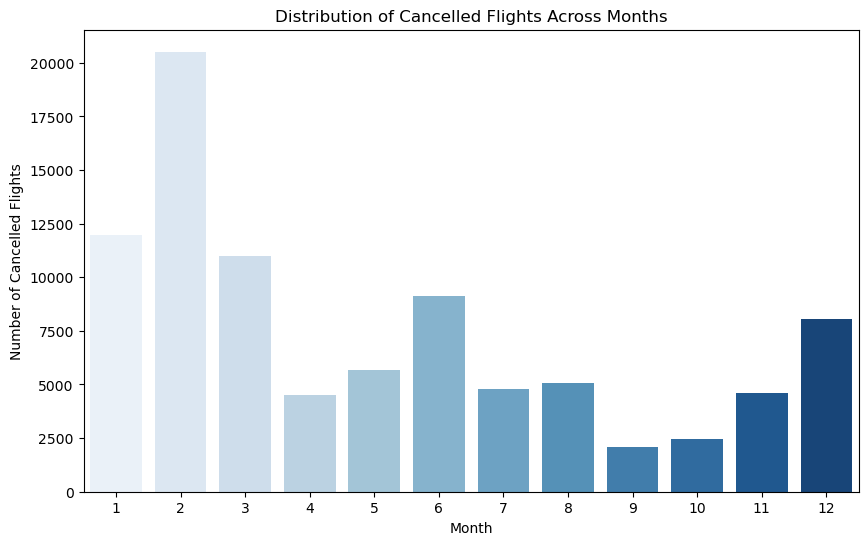

In [23]:
# Distribution of cancelled flights across different months

plt.figure(figsize=(10, 6))
sns.countplot(data=cancelled_flights, x='MONTH', palette='Blues')
plt.title('Distribution of Cancelled Flights Across Months')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.show()


### Observations: 
#### In January and February 2015 there was the highest number of cancellations in 2015. Possible cause - winter weather conditions in many regions.
#### The rest of the months have a lower number of cancellations, particullary during the summer. Possible cause - weather conditions improved.

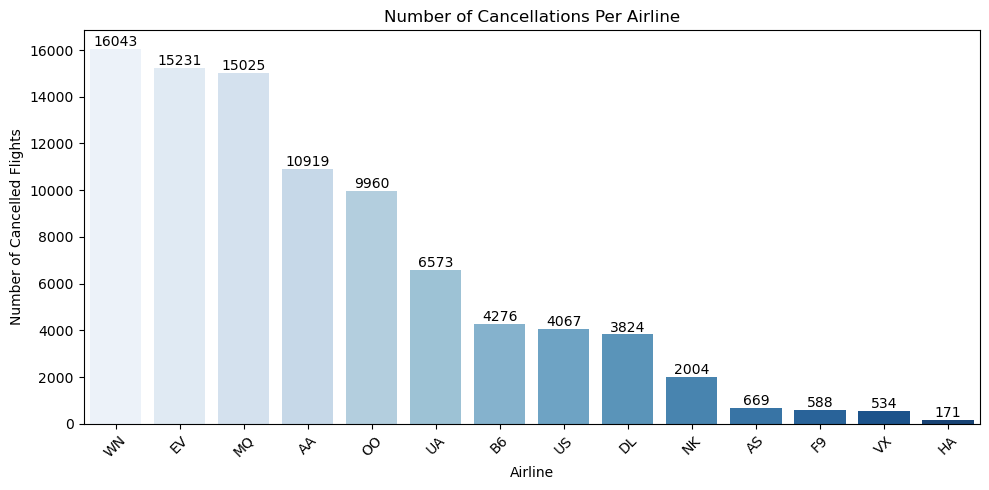

In [24]:
# Number of cancellations per airline with values on the bars

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=cancelled_flights, x='AIRLINE', order=cancelled_flights['AIRLINE'].value_counts().index, palette='Blues')
plt.title('Number of Cancellations Per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Cancelled Flights')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Observations:
##### The Southwest Airlines Co (WN)., ExpressJet (EV) and Envoy Air(MQ) airlines are the leader of cancellations flights.
##### The Hawaiian Airlines (HA), Frontier Airlines (F9), Virgin America (VX): 534 cancelled flights and Alaska Airlines (AS) have a much lower level  of flights cancellations.
##### Possible Reasons- Southwest Airlines, ExpressJet, and Envoy Air operate a large number of flights, which could contribute to a higher absolute number of cancellations. Hawaiian Airlines, Frontier Airlines, Virgin America, and Alaska Airlines operate fewer flights, potentially leading to fewer cancellations.

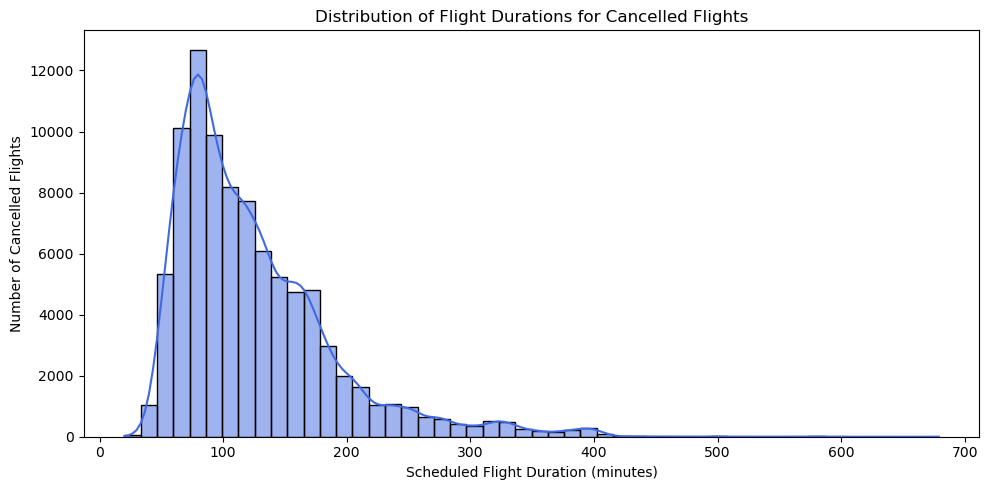

In [25]:
# Distribution of flight durations for cancelled flights 

plt.figure(figsize=(10, 5))
sns.histplot(cancelled_flights['SCHEDULED_TIME'], bins=50, color='royalblue', kde=True)
plt.title('Distribution of Flight Durations for Cancelled Flights')
plt.xlabel('Scheduled Flight Duration (minutes)')
plt.ylabel('Number of Cancelled Flights')
plt.tight_layout()
plt.show()


### Observations:
#### Flights with a longer duration are the least cancelled and the short flights are the most cancelled.
#### The most cancelled fligths are with the duration between 60 - 70 minutes.
#### Possible causes:
#### Higher Frequency: There are more short-haul flights, increasing the chances of cancellations.
##### Operational Challenges: Quick turnaround times for short-haul flights can lead to delays and cancellations.
##### Air Traffic Congestion: Short-haul flights often operate in busier airspace.
##### Economic Decisions: Airlines might prioritize long-haul flights and choose to cancel short-haul flights due to cost considerations


### Number of cancellations by Origin Airport

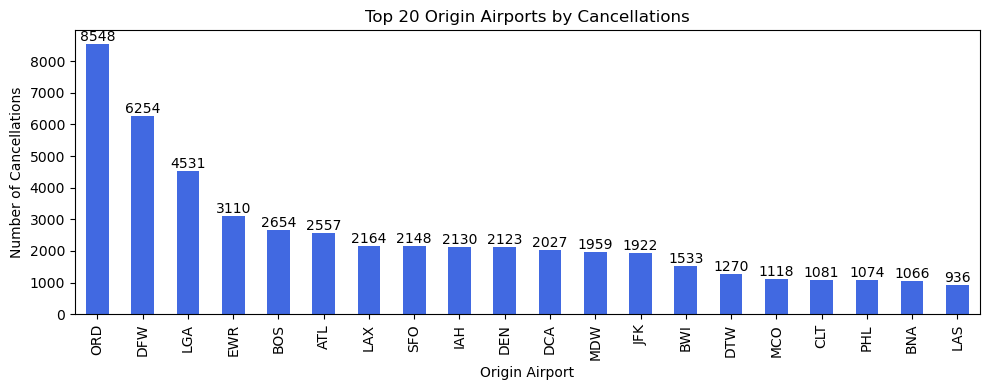

In [26]:
# Count cancellations per origin airport
airport_cancellations = cancelled_flights['ORIGIN_AIRPORT'].value_counts()

# Obtain top 20 airports with the most cancellations
top_airports = airport_cancellations.head(20)

plt.figure(figsize=(10, 4))
ax = top_airports.plot(kind='bar', color='royalblue')
plt.title('Top 20 Origin Airports by Cancellations')
plt.xlabel('Origin Airport')
plt.ylabel('Number of Cancellations')

# Annotating bars with the count of cancellations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

### Obervations:
##### ORD, DFW, LGA, EWR, BOS, ATL, LAX, SFO, IAH, DEN: These are all major airports in large metropolitan areas. They handle a high volume of passengers and flights, making them predisposed to cancellations due to operational issues, weather, and air traffic congestion. Airports like ORD and ATL are known for their challenging weather conditions, especially during winter.
#### MDW and JFK: These airports are also located in major cities but are smaller in comparison to ORD and LAX. They still experience a significant number of cancellations due to their location and the volume of traffic they handle.
#### DCA, BWI, DTW, MCO, CLT, PHL, BNA, LAS: These airports vary in size but are significant in their respective regions. They can experience cancellations due to a combination of weather, operational issues, and air traffic congestion.

## Scheduled Flight duration
#### Understanding what types of flights are the most affected by cancellation for each airlines

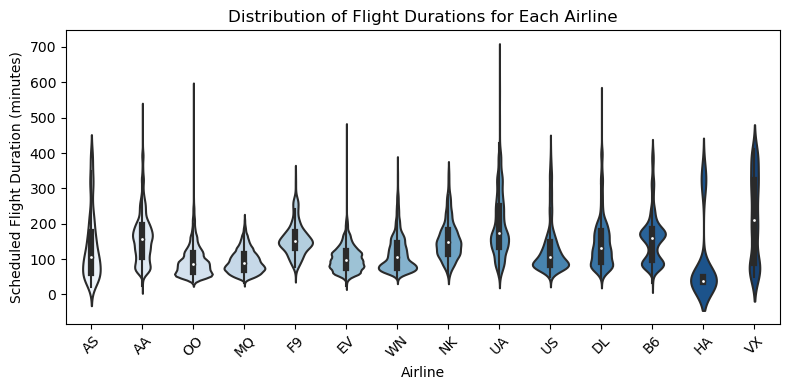

In [27]:
# Airline vs. Scheduled Flight Duration (Violin Plot)
plt.figure(figsize=(8, 4))
ax = sns.violinplot(data=cancelled_flights, x='AIRLINE', y='SCHEDULED_TIME', palette="Blues")
ax.set_title('Distribution of Flight Durations for Each Airline', fontsize=12)
ax.set_xlabel('Airline', fontsize=10)
ax.set_ylabel('Scheduled Flight Duration (minutes)', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Observations: 
##### American Airlines (AA): Cancelled flights have a wide range of durations.Short-haul and long-haul flights are subject to cancellations.
##### SkyWest Airlines (OO) and Envoy Air (MQ): Cancelled flights tend to be shorter in duration, indicating that short-haul flights are more commonly cancelled.
##### United Airlines (UA): Has a relatively higher average flight duration for cancelled flights, suggesting that longer flights are also predisposed to cancellations.
##### Southwest Airlines (WN): Cancelled flights have a median duration that suggests a mix of short to medium-haul flights.
##### Virgin America (VX): Cancelled flights tend to be longer on average, indicating that longer flights are subject to cancellations.

### Origin Airport, Destination Airport, and Number of Cancellations
####  Identifying specific routes that are more exposed to cancellations 

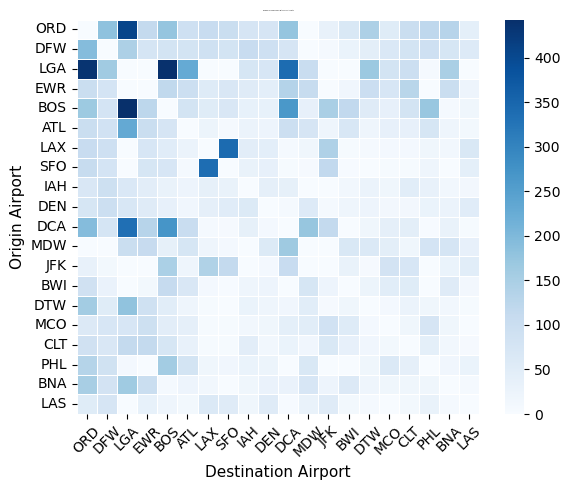

In [29]:
# Origin Airport, Destination Airport and Number of Cancellations
pivot_table = cancelled_flights.pivot_table(index='ORIGIN_AIRPORT', columns='DESTINATION_AIRPORT', values='FLIGHT_NUMBER', aggfunc='count', fill_value=0)
top_airports = pivot_table.sum(axis=1).sort_values(ascending=False).index[:20]
pivot_table = pivot_table.loc[top_airports, top_airports]

# Multivariate Analysis: Origin Airport, Destination Airport, and Number of Cancellations (Heatmap)
plt.figure(figsize=(6, 5))
ax = sns.heatmap(pivot_table, cmap="Blues", linewidths=.5)
ax.set_title('Number of Cancelled Flights as per Airports', fontsize=1)
ax.set_xlabel('Destination Airport', fontsize=11)
ax.set_ylabel('Origin Airport', fontsize=11)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Observations:
#### Boston (BOS) ⇆ LaGuardia (LGA): 443 cancellations from BOS to LGA, 441 cancellations from LGA to BOS
#### LaGuardia (LGA) ⇆ O'Hare (ORD): 435 cancellations from LGA to ORD, 408 cancellations from ORD to LGA
##### Los Angeles (LAX) ⇆ San Francisco (SFO): 342 cancellations from LAX to SFO, 338 cancellations from SFO to LAX
##### LaGuardia (LGA) ⇆ Reagan National (DCA): 340 cancellations from LGA to DCA, 334 cancellations from DCA to LGA
##### Reagan National (DCA) ⇆ Boston (BOS): 271 cancellations from DCA to BOS, 266 cancellations from BOS to DCA
##### These airports are in busy areas and experience challenging weather, especially during winter, leading to cancellations.


## Diverted Flights - Understanding the data structure and types and summary statistics

In [30]:
# Analysing diverted_flights subset

print(diverted_flights.describe())# Summary Statistics
print(diverted_flights['AIRLINE'].value_counts()) # Value Counts
print(diverted_flights.dtypes) # Data types


              MONTH           DAY  FLIGHT_NUMBER  SCHEDULED_DEPARTURE  \
count  15187.000000  15187.000000   15187.000000         15187.000000   
mean       6.458089     16.044775    2303.695463          1322.489893   
std        3.244098      8.858620    1829.698293           461.952509   
min        1.000000      1.000000       1.000000             5.000000   
25%        4.000000      9.000000     777.000000           931.000000   
50%        6.000000     16.000000    1734.000000          1343.000000   
75%        9.000000     24.000000    3589.000000          1703.000000   
max       12.000000     31.000000    7431.000000          2359.000000   

       DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT    WHEELS_OFF  \
count    15187.000000     15187.000000  15187.000000  15187.000000   
mean      1348.934813        25.891815     18.185751   1373.270560   
std        484.929352        62.847855     12.455037    487.541908   
min          1.000000       -35.000000      1.000000      1.00

### Overall interpretation of the above data
#### The average departure delay is around 25.89 minutes, but the standard deviation is large, suggesting that the departure delay varies significantly across flights.
#### The flights cover a range of distances and durations, indicating that the deviations are not limited to a particular type of flight.

## Diverted Flights - Diversions overview, airlines analysis, temporal analysis and flight and routes diversions

### Distribution of diverted flights across different months

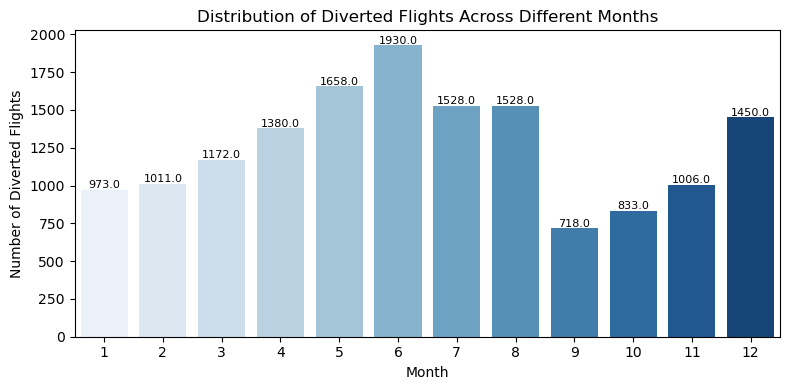

In [31]:
# Distribution of diverted flights across different months
plt.figure(figsize=(8, 4))

# Plot distribution of diverted flights across different months
ax = sns.countplot(data=diverted_flights, x='MONTH', palette='Blues')
ax.set_title('Distribution of Diverted Flights Across Different Months', fontsize=12)
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Number of Diverted Flights', fontsize=10)

# Add values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 1),
                textcoords='offset points')

plt.tight_layout()
plt.show()


### Observations:
#### In May, July, and August there are more diverted flights compared to the other months.
#### Possible cause of diversions during these months, could be congestion during holiday season and high temperatures.

### Distribution of Diverted Flights Across Airlines


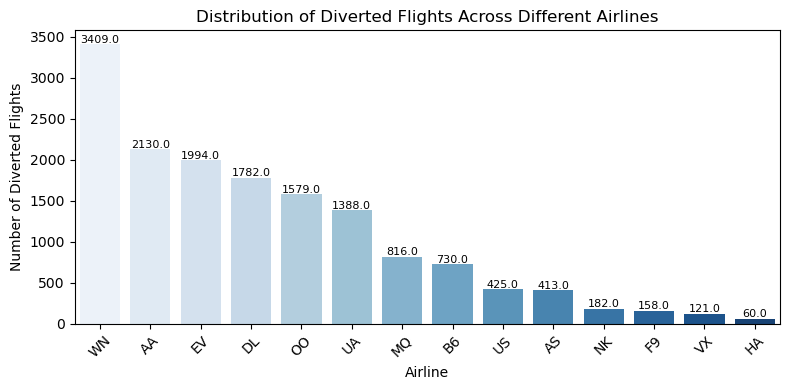

In [32]:
# Plotting the distribution of diverted flights across airlines
plt.figure(figsize=(8, 4))

# Plot distribution of diverted flights across airlines 
ax = sns.countplot(data=diverted_flights, x='AIRLINE', palette='Blues', order = diverted_flights['AIRLINE'].value_counts().index)
ax.set_title('Distribution of Diverted Flights Across Different Airlines', fontsize=12)
ax.set_xlabel('Airline', fontsize=10)
ax.set_ylabel('Number of Diverted Flights', fontsize=10)
ax.tick_params(axis='x', rotation=45)

# Add values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 1),
                textcoords='offset points')

plt.tight_layout()
plt.show()


### Observation:
#### Southwest Airlines (WN), SkyWest Airlines (OO), American Airlines (AA, Delta Air Lines (DL), have the largest number of diversions. These airlines are some of the largest airlines in USA and there is a high volume of flights which can lead to many diversions.
##### Virgin America (VX), Frontier Airlines (F9), Hawaiian Airlines (HA),Alaska Airlines (AS) are small and regional airlines with a reduce number of flights, hence the reason of the reduced number of diversions.

### Flight durations of diverted flights

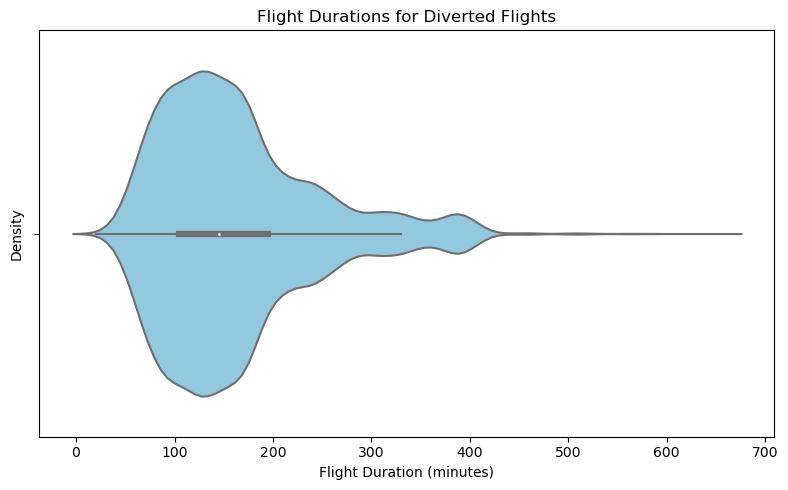

In [33]:
# Flight durations of diverted flights
plt.figure(figsize=(8, 5))

# Plot Violin Plot for Scheduled Flight Duration
sns.violinplot(x=diverted_flights['SCHEDULED_TIME'], color="skyblue")
plt.title('Flight Durations for Diverted Flights', fontsize=12)
plt.xlabel('Flight Duration (minutes)', fontsize=10)
plt.ylabel('Density', fontsize=10)

plt.tight_layout()
plt.show()


In [34]:
# Calculate the summary statistics for Scheduled Flight Duration
scheduled_time_stats = diverted_flights['SCHEDULED_TIME'].describe()

# Print the summary statistics
print(scheduled_time_stats)

count    15187.000000
mean       162.288358
std         80.320383
min         20.000000
25%        105.000000
50%        145.000000
75%        195.000000
max        652.000000
Name: SCHEDULED_TIME, dtype: float64


#### Observations: 
#### Most of the diverted flights have scheduled durations around 2 hours.

### Distribution of departure delay across airlines

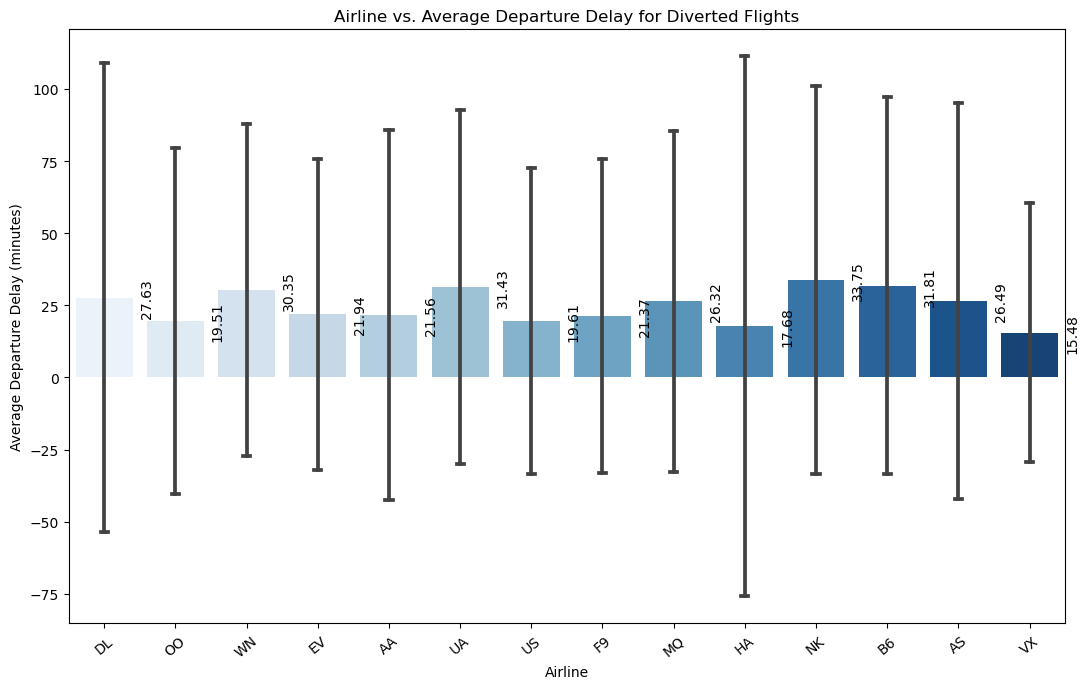

In [35]:
# Distribution of departure delays across airlines
plt.figure(figsize=(11, 7))

# Create a Bar Plot for Airline vs. Average Departure Delay with Error Bars representing Standard Deviation
ax = sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=diverted_flights, ci="sd", palette="Blues", capsize=0.1)
ax.set_title('Airline vs. Average Departure Delay for Diverted Flights', fontsize=12)
ax.set_xlabel('Airline', fontsize=10)
ax.set_ylabel('Average Departure Delay (minutes)', fontsize=10)
ax.tick_params(axis='x', rotation=40)

# Adding the mean values vertically on the side of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width(), p.get_height()),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points', rotation=90)
plt.tight_layout()
plt.show()

### Observations: 
##### American Airlines (AA): Diverted flights on American Airlines tend to have high departure delays with some variability.
##### Southwest Airlines (WN): Diverted flights have lower departure delays on average, with moderate variability.
##### SkyWest Airlines (OO): Diverted flights tend to have lower and more consistent departure delays.
##### United Airlines (UA):Diverted flights have a wide range of departure delays, with some flights experiencing significantly higher 
##### Other Airlines: Each airline has its own pattern of average departure delays and variability, influenced by their operational practices, flight routes, and other factors.


### Identifying High-Diversion Routes

In [36]:
# Identifying High-Diversion Routes
diverted_flights['FLIGHT_ROUTE'] = diverted_flights['ORIGIN_AIRPORT'].astype(str) + " to " + diverted_flights['DESTINATION_AIRPORT'].astype(str)

# Calculate the number of diversions for each route
flight_route_diversions = diverted_flights['FLIGHT_ROUTE'].value_counts()

# Show the top 10 flight routes with the most diversions
top_diversion_routes = flight_route_diversions.head(10)
top_diversion_routes



MIA to LGA    76
SLC to SUN    72
ORD to LGA    66
BOS to LAX    63
BOS to SFO    62
LAX to ASE    54
STT to PHL    52
ATL to LGA    48
ORD to DFW    47
DFW to LGA    47
Name: FLIGHT_ROUTE, dtype: int64

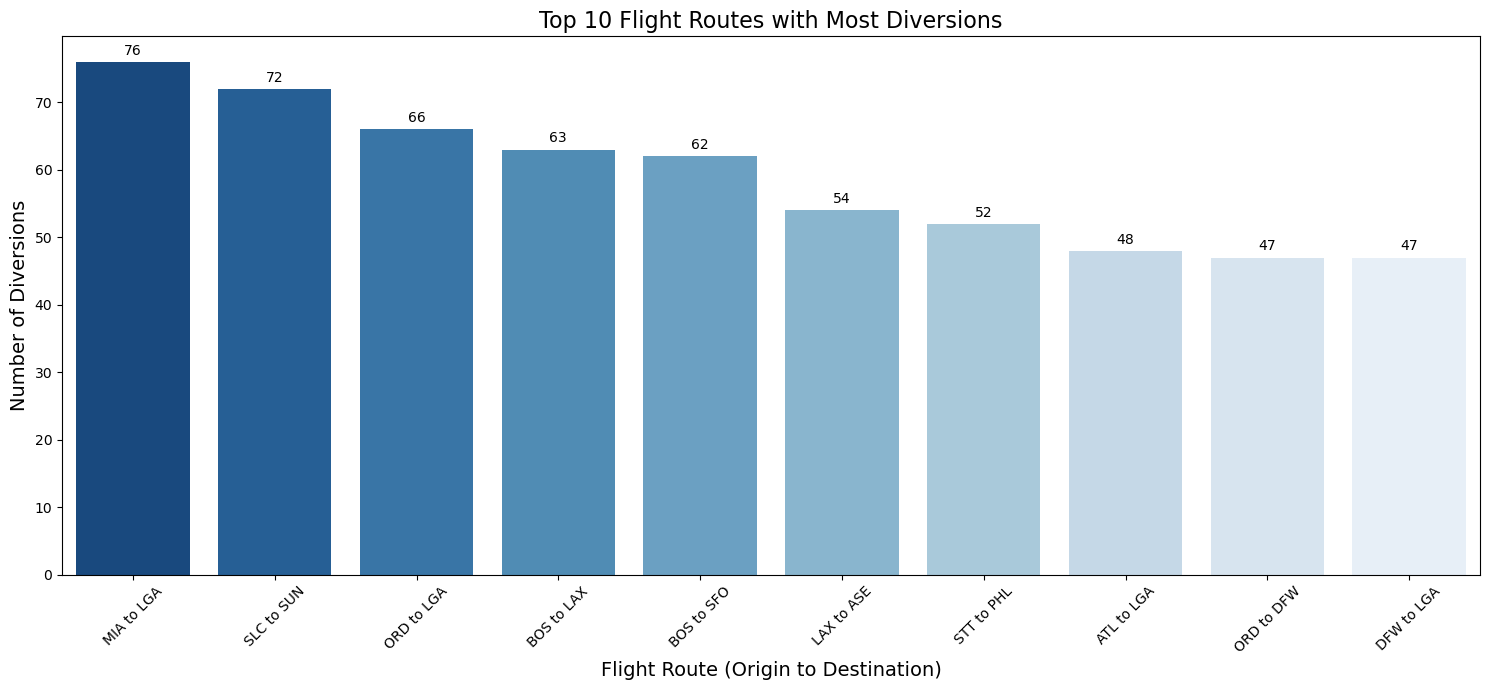

In [59]:
# High Diversion Routes

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=top_diversion_routes.index, y=top_diversion_routes.values, palette='Blues_r')
ax.set_title('Top 10 Flight Routes with Most Diversions', fontsize=16)
ax.set_xlabel('Flight Route (Origin to Destination)', fontsize=14)
ax.set_ylabel('Number of Diversions', fontsize=14)

# Adding the values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')

ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### Observations and potential reasons for diversions:
##### Miami (MIA) to LaGuardia (LGA): 76 diversions - weather conditions such as storms and hurricanes
##### Salt Lake City (SLC) to Friedman Memorial (SUN): 72 diversions - weather conditions due to mountain terrain around SUN
##### Chicago O'Hare (ORD) to LaGuardia (LGA): 66 diversions - Extremely busy airports
##### Boston (BOS) to Los Angeles (LAX): 63 diversions - Routes with mainly long duration flights may be diverted due to wether conditions or operational issues
##### Boston (BOS) to San Francisco (SFO): 62 diversions - Routes with mainly long duration flights may be diverted due to wether conditions or operational issues
##### Los Angeles (LAX) to Aspen (ASE): 54 diversions - Aispen is located in Rocky Mountains and departing and landing can be challeging when the weather is not optimal.
##### St. Thomas (STT) to Philadelphia (PHL): 52 diversions - Carrbbean weather and harsh winters in Philladephia might be a possible cause for diversions.
##### Atlanta (ATL) to LaGuardia (LGA): 48 diversions - Atlanta is one of the bussiest airports in the world and when is congested some of the flights could be diverted.
##### Chicago O'Hare (ORD) to Dallas/Fort Worth (DFW): 47 diversions - Major hubs airports with high traffic volumes
##### Dallas/Fort Worth (DFW) to LaGuardia (LGA): 47 diversions - Major hubs airports with high traffic volumes

## Departed Flights - Understanding the data structure and types and summary statistics

In [37]:
# Analysing departed_flights subset

print(departed_flights.describe())# Summary Statistics
print(departed_flights['AIRLINE'].value_counts()) # Value Counts
print(departed_flights.dtypes) # Data types

              MONTH           DAY  FLIGHT_NUMBER  SCHEDULED_DEPARTURE  \
count  5.714008e+06  5.714008e+06   5.714008e+06         5.714008e+06   
mean   6.547799e+00  1.570759e+01   2.164384e+03         1.328907e+03   
std    3.397421e+00  8.774394e+00   1.754706e+03         4.835251e+02   
min    1.000000e+00  1.000000e+00   1.000000e+00         1.000000e+00   
25%    4.000000e+00  8.000000e+00   7.280000e+02         9.160000e+02   
50%    7.000000e+00  1.600000e+01   1.681000e+03         1.325000e+03   
75%    9.000000e+00  2.300000e+01   3.211000e+03         1.730000e+03   
max    1.200000e+01  3.100000e+01   9.320000e+03         2.359000e+03   

       DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT    WHEELS_OFF  \
count    5.714008e+06     5.714008e+06  5.714008e+06  5.714008e+06   
mean     1.335066e+03     9.294842e+00  1.606550e+01  1.357099e+03   
std      4.964198e+02     3.688972e+01  8.882449e+00  4.980237e+02   
min      1.000000e+00    -8.200000e+01  1.000000e+00  1.000000

### Departed Flights - Operational Analysis on busiest airports, distribution of flight delays and route analysis

In [41]:
# Operational Analysis: Counting the number of departures for each airport
top_airports_by_departure = departed_flights['ORIGIN_AIRPORT'].value_counts().head(10)

# Flight Delays: Calculating the mean and median departure delay for each airport
airport_delays = departed_flights.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].agg(['mean', 'median', 'count'])
top_airport_delays_by_mean = airport_delays[airport_delays['count'] > 1000].sort_values(by='mean', ascending=False).head(10)
top_airport_delays_by_median = airport_delays[airport_delays['count'] > 1000].sort_values(by='median', ascending=False).head(10)

# Route Analysis: Counting the number of flights for each route
routes = departed_flights.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).size().reset_index(name='COUNT')
top_routes = routes.sort_values(by='COUNT', ascending=False).head(10)

# Display the results
print("Top 10 Airports by Number of Departures:")
print(top_airports_by_departure)

print("\nTop 10 Airports by Mean Departure Delay:")
print(top_airport_delays_by_mean)

print("\nTop 10 Airports by Median Departure Delay:")
print(top_airport_delays_by_median)

print("\nTop 10 Most Frequent Routes:")
print(top_routes)

Top 10 Airports by Number of Departures:
ATL    343506
ORD    276554
DFW    232647
DEN    193402
LAX    192003
PHX    145552
SFO    145491
IAH    144019
LAS    131937
MSP    111055
Name: ORIGIN_AIRPORT, dtype: int64

Top 10 Airports by Mean Departure Delay:
                     mean  median   count
ORIGIN_AIRPORT                           
11298           23.451187     0.0    1137
ASE             17.394729    -2.0    3263
EGE             15.855593    -4.0    1198
COU             14.667204    -3.0    1241
TTN             14.199928    -4.0    2771
ORD             14.033679    -1.0  276554
EWR             13.550818     0.0   98341
BWI             13.255333     0.0   84329
LGA             13.165658    -2.0   94834
MDW             12.766283     1.0   78685

Top 10 Airports by Median Departure Delay:
                     mean  median   count
ORIGIN_AIRPORT                           
MDW             12.766283     1.0   78685
DAL             11.935625     1.0   58672
10821            8.327588 

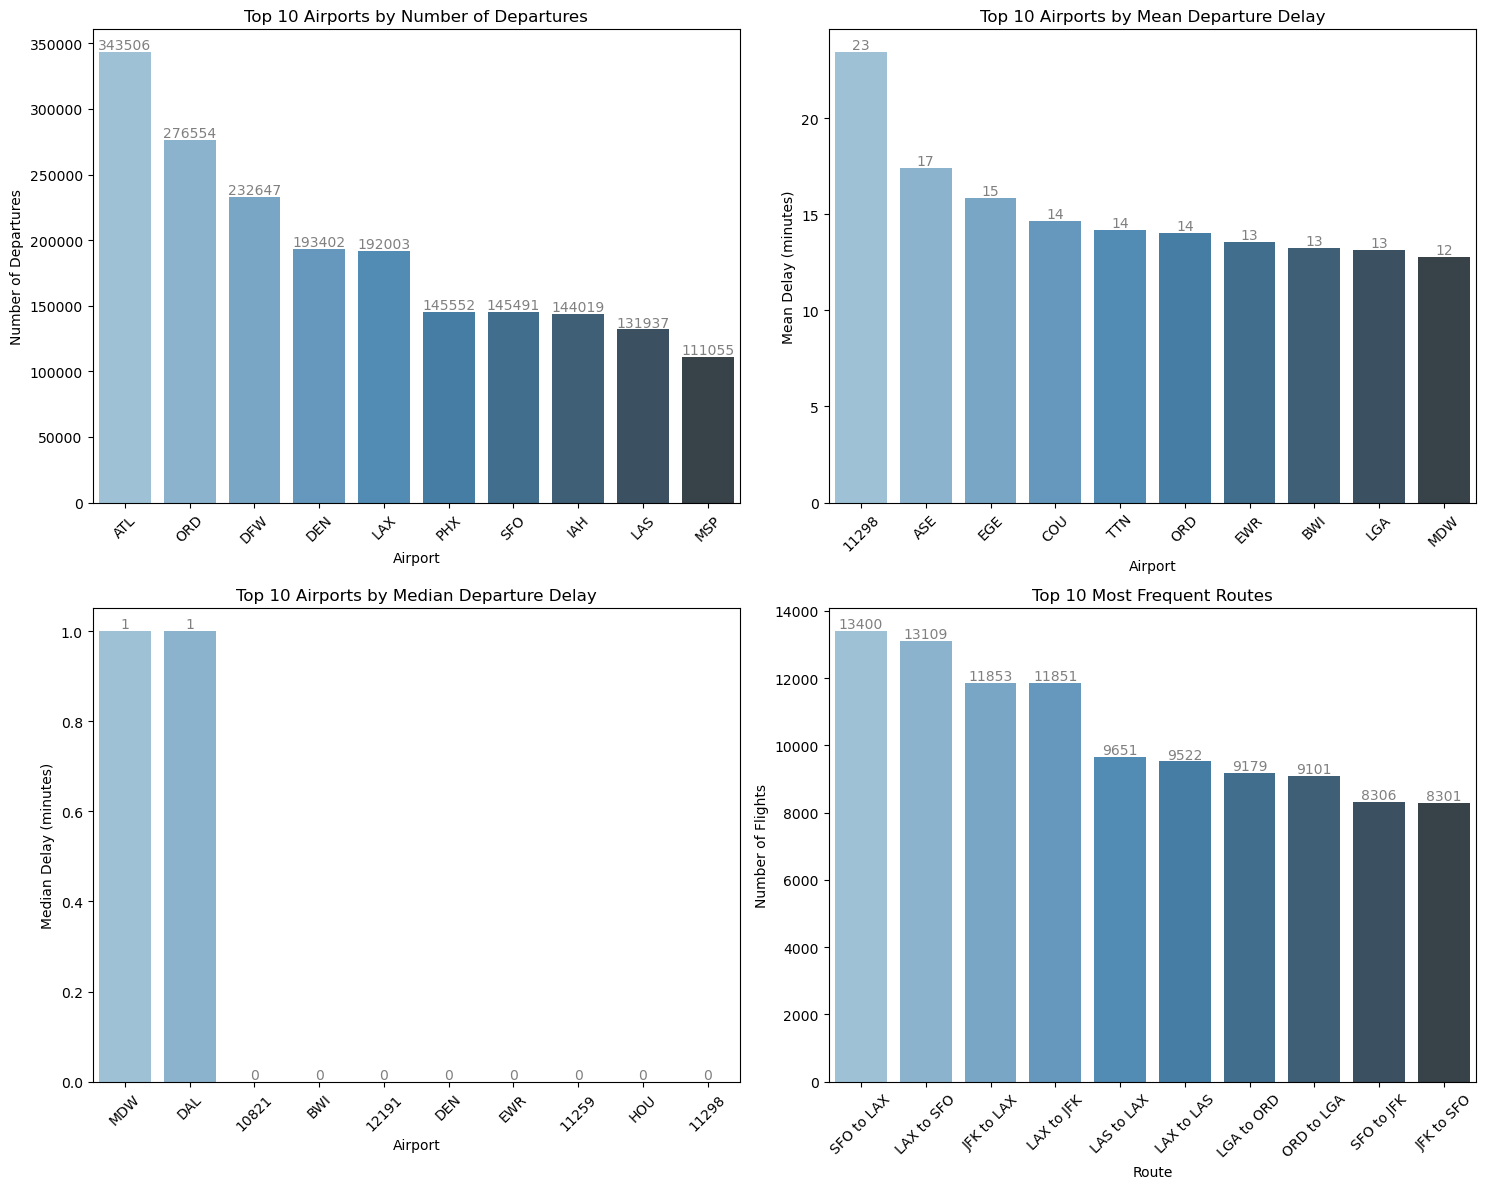

In [44]:
# Set up the matplotlib figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Subfigure for Operational Analysis: Top 10 Airports by Number of Departures
sns.barplot(ax=axs[0, 0], x=top_airports_by_departure.index, y=top_airports_by_departure.values, palette="Blues_d")
axs[0, 0].set_title('Top 10 Airports by Number of Departures')
axs[0, 0].set_ylabel('Number of Departures')
axs[0, 0].set_xlabel('Airport')
axs[0, 0].tick_params(axis='x', rotation=45)

# Subfigure for Flight Delays: Mean Delay by Airport
sns.barplot(ax=axs[0, 1], x=top_airport_delays_by_mean.index, y=top_airport_delays_by_mean['mean'], palette="Blues_d")
axs[0, 1].set_title('Top 10 Airports by Mean Departure Delay')
axs[0, 1].set_ylabel('Mean Delay (minutes)')
axs[0, 1].set_xlabel('Airport')
axs[0, 1].tick_params(axis='x', rotation=45)

# Subfigure for Flight Delays: Median Delay by Airport
sns.barplot(ax=axs[1, 0], x=top_airport_delays_by_median.index, y=top_airport_delays_by_median['median'], palette="Blues_d")
axs[1, 0].set_title('Top 10 Airports by Median Departure Delay')
axs[1, 0].set_ylabel('Median Delay (minutes)')
axs[1, 0].set_xlabel('Airport')
axs[1, 0].tick_params(axis='x', rotation=45)

# Subfigure for Route Analysis: Most Frequent Routes
sns.barplot(ax=axs[1, 1], x=top_routes.apply(lambda x: f"{x['ORIGIN_AIRPORT']} to {x['DESTINATION_AIRPORT']}", axis=1), 
            y=top_routes['COUNT'], palette="Blues_d")
axs[1, 1].set_title('Top 10 Most Frequent Routes')
axs[1, 1].set_ylabel('Number of Flights')
axs[1, 1].set_xlabel('Route')
axs[1, 1].tick_params(axis='x', rotation=45)

# Add values on the bars for all plots
for ax in axs.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                    textcoords='offset points')

# Adjust the layout
plt.tight_layout()

# Display the figure
plt.show()

### Observations:
#### Atlanta (ATL) has the highest number of departures, significantly more than the second-place Chicago O'Hare (ORD). All the airports are the major Hubs in USA.
#### Dallas/Fort Worth International Airport (DFW), has the highest mean departure delay at over 23 minutes, but its median delay is 0, indicating a highly skewed distribution of delays.
#### Aspen/Pitkin County Airport (ASE) and Eagle County Airport (EGE) also have high mean delays, which may be due to weather conditions or the challenges of operating in mountainous areas.
#### Chicago O'Hare (ORD) and Newark Liberty (EWR) are large airports that also appear on this list, suggesting a significant impact of delays at these major hubs.
#### Chicago Midway (MDW) and Dallas Love Field (DAL) have the highest median delays of 1 minute.
#### Several airports have a median delay of 0 minutes, which might suggest that more than half of the flights depart on time or early.
#### The most frequent routes are between San Francisco (SFO) and Los Angeles (LAX), and vice versa, which indicates a high demand for travel between these major California cities.
#### Other frequent routes involve cross-country flights between New York (JFK) and Los Angeles (LAX), as well as between New York (JFK) and San Francisco (SFO), reflecting the high traffic between these major economic and cultural centers.
